https://zhajiman.github.io/post/cartopy_introduction/

此前 Python 最常用的地图包是 Basemap，然而它将于2020年被弃用，官方推荐使用 Cartopy 包作为替代。Cartopy 是英国气象局开发的地图绘图包，实现了 Basemap 的大部分功能，还可以通过 Matplotlib 的 API 实现丰富的自定义效果。

本文将会从一个 NCL 转 Python 的入门者的角度，介绍如何安装 Cartopy，如何绘制地图，并实现一些常用的效果。

本文写作时 Cartopy 的版本为 0.17.0。

安装 Cartopy 和相关的库
通过 Conda 来安装 Cartopy 是最为简单方便的。首先我们需要下载最新的 Python 3 的 Conda 环境（Anaconda 或 Miniconda 皆可），设置国内镜像源，建立好虚拟环境，然后参照 Cartopy 官网的安装说明，执行操作：

`conda install -c conda-forge cartopy`

画地图的基本流程
以一个简单的例子来说明：

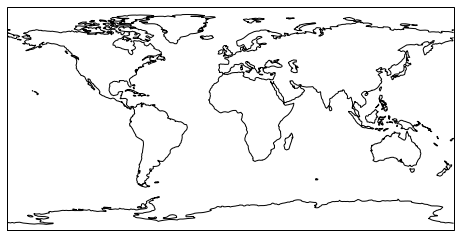

In [3]:
# 导入所需的库
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# 创建画布以及轴
fig = plt.figure(figsize = [8,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用轴的方法画海岸线
ax.coastlines()
plt.show()

Cartopy 是利用 Matplotlib 来画图的，因此首先要导入pyplot模块。在 Cartopy 中，每种投影都是一个类，被存放在cartopy.crs中，crs 即坐标参考系统（Coordinate Reference Systems）之意。所以接着要导入这个模块。这里选取最常用的等距圆柱投影ccrs.PlateCarree作为地图投影。

我们知道，Matplotlib 画图是通过调用Axes类的方法来完成的。Cartopy 创造了一个Axes的子类，GeoAxes，它继承了前者的基本功能，还添加了一系列绘制地图元素的方法。生成一个GeoAxes实例的办法是，在创建 axes（或 subplot）时，通过参数projection指定一个ccrs中的投影实例。这里便利用这一方法生成了一个等距圆柱投影下的轴。

最后调用轴的方法coastlines画出海岸线，默认以本初子午线为中心，比例尺为1cm:1100km。

因此用 Cartopy 画地图的基本流程并不复杂：

- 创建画布。
- 通过projection实例化GeoAxes。
- 调用Axes或GeoAxes的方法在轴上画图。

## GeoAxes 的一些有用的方法
GeoAxes有不少有用的方法，这里列举如下：

set_global：让当前轴的显示范围扩展至投影的最大范围。例如，对PlateCarree投影的轴使用后，地图会变成全球的。
- set_extent：给出元组 (x0, x1, y0, y1) 以限制轴的地图显示范围。
- set_xticks：设置 x 轴的刻度。
- set_yticks：设置 y 轴的刻度。
- gridlines：给地图添加网格线。
- coastlines：在地图上绘制海岸线。
- stock_img：给地图添加低分辨率的地形图背景。
- add_feature：给地图添加特征实例。

## 使用不同的投影

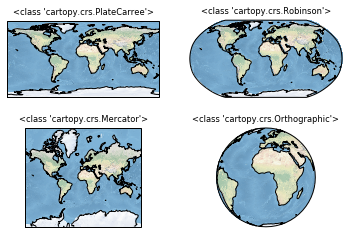

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# 选取多种投影
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic()]

# 画出多子图
fig = plt.figure()
for i, proj in enumerate(projections,1):
    ax = fig.add_subplot(2, 2, i, projection=proj)
    ax.stock_img()  # 添加低分辨率的地形图
    ax.coastlines()
    ax.set_title(f'{type(proj)}', fontsize='small')

plt.show()

这个例子展示了如何使用别的投影和画出多子图。其中stock_img方法可以给地图添加低分辨率的地形背景图，让地图显得不那么寒碜。

投影本身在实例化时可以指定一些参数，例如ccrs.PlateCarree(central_longitude=180)可以让等距圆柱投影的全球图像的中央位于太平洋的180度经线处。

画多子图还可以用plt.subplots函数，但是投影就只能指定一种了。

## 在地图上添加特征（Features）
除了画出海岸线外，我们常常需要在地图上画出更多特征，例如陆地海洋、河流湖泊等。cartopy.feature中便准备了许多常用的特征对象。需要注意的是，这些对象的默认比例是1cm:1100km。
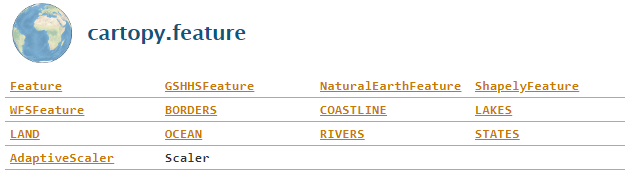

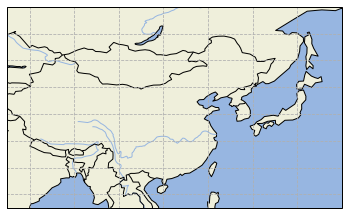

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure()
proj = ccrs.PlateCarree()
ax = fig.add_subplot(111, projection=proj)

# 设置经纬度范围,限定为中国
# 注意指定crs关键字,否则范围不一定完全准确
extent = [75, 150, 15, 60]
ax.set_extent(extent, crs=proj)
# 添加各种特征
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
# 添加网格线
ax.gridlines(linestyle='--')

plt.show()

add_feature方法能够把cfeature里的特征对象添加到地图上。上面的例子中就依次添加了海洋、陆地、湖泊、河流，还有国界线的特征。由于渲染实际上采用的是 Matplotlib 里 annotations 的方法，所以添加的特征本质上就是一些线或者多边形，edgecolor、facecolor等常用关键字都可以用来指定这些特征的效果。

在添加特征时，命令行可能会显示一些警告信息，这是因为 Cartopy 本身并不带有任何地图数据，在首次执行画图命令时，会自动从 Natural Earth 网站下载开源的地图数据，由于画图指令默认的地图分辨率都是很粗的1cm:1100km，所以下载很快，显得像是 Cartopy 内置了地图数据一样。此后再运行时便不会出现警告。下一节里就讲讲如何设置地图数据的分辨率。

另外还有一个非常重要的问题，Cartopy 画出来的中国地图不能直接用！例如上面的图中就没有台湾地区，藏南处也有错误。这是因为国外提供的地图数据的国界线普遍不符合我国的地图标准（政治因素），在后面的小节中还会提到如何画出符合标准的中国地图。

## 设置地图分辨率与下载地图
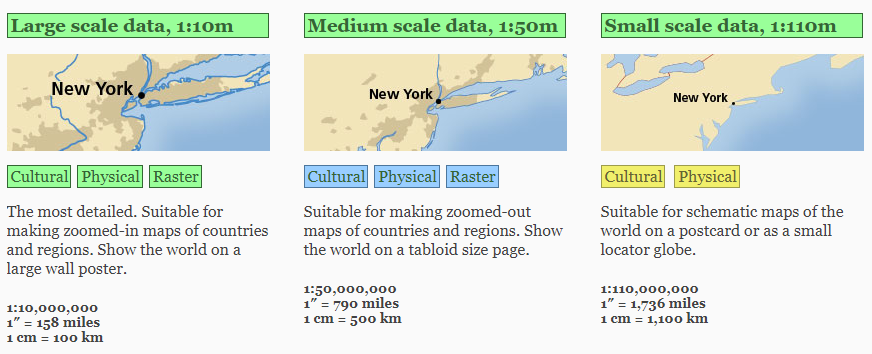
Cartopy 原生支持 Natural Earth 的地图，分辨率有三档：1:10m、1:50m、1:110m（然而我看不懂这个比例尺，难道1指的是1微米？），默认的分辨率是1:110m，这在很多场合下会显得很粗糙。设置分辨率的方法如下：
```
# coastlines方法使用resolution关键字
ax.coastlines(resolution='50m')
# add_feature方法则对cfeature对象采用with_scale方法
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
```

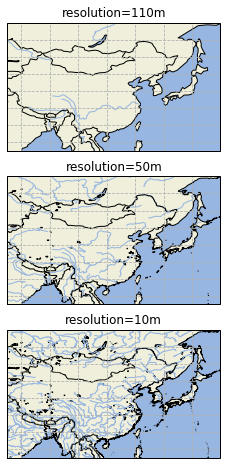

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize = [8,8])
res = ['110m', '50m', '10m']
extent = [75, 150, 15, 60]

proj = ccrs.PlateCarree()
for i in range(3):
    ax = fig.add_subplot(3, 1, i+1, projection=proj)
    ax.set_extent(extent, crs=proj)

    ax.add_feature(cfeature.OCEAN.with_scale(res[i]))
    ax.add_feature(cfeature.LAND.with_scale(res[i]), edgecolor='black')
    ax.add_feature(cfeature.LAKES.with_scale(res[i]), edgecolor='black')
    ax.add_feature(cfeature.RIVERS.with_scale(res[i]))
    ax.add_feature(cfeature.BORDERS.with_scale(res[i]))
    ax.gridlines(linestyle='--')

    ax.set_title('resolution=' + res[i])

plt.show()

## 在地图上添加数据
在直接调用 ax.plot、ax.contourf等方法在地图上添加数据之前，需要了解 Cartopy 的一个核心概念：在实例化一个GeoAxes时，通过projection关键字指定了这个地图所处的投影坐标系，这个坐标系的投影方式和原点位置都可以被指定。但是我们手上的数据很可能并不是定义在这个坐标系下的（例如那些规整的经纬度网格数据），因此在定义好的地图上添加数据时，需要通过transform关键字指定我们的数据所处的坐标系。画图过程中，Cartopy 会自动进行这两个坐标系之间的换算，把我们的数据正确投影到轴的坐标系上。下面给出一个例子：

https://zhuanlan.zhihu.com/p/80210579

https://www.youtube.com/watch?v=uqnA06fqhqk

https://www.youtube.com/watch?v=Qc-EPKucq0w

## geopandas，用python分析地理空间数据原来这么简单！

pandas应该是大家非常熟悉的Python第三方库，其主要用于数据整理和分析，这次来介绍pandas的一个近亲-geopandas

geopandas是用来处理地理空间数据的python第三方库，它是在pandas的基础上建立的，完美地融合了pandas的数据类型，并且提供了操作地理空间数据的高级接口，使得在python中进行GIS操作变成可能。

先看个示例，我们在python中显示世界地图

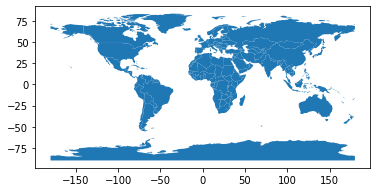

In [14]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot()
plt.show()

group use different color


In [ ]:
cmap = plt.get_cmap('jet')
low = cmap(0.5)
medium =cmap(0.2)
high = cmap(0.7)


for i in range(0,3):
    patches[i].set_facecolor(low)
for i in range(4,13):
    patches[i].set_facecolor(medium)
for i in range(14,30):
    patches[i].set_facecolor(high)

plt.xlabel("Watt Hours", fontsize=16)  
plt.ylabel("Households", fontsize=16)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.show()

In [ ]:
cmap = plt.get_cmap('jet')
low = cmap(0.5)
medium =cmap(0.25)
high = cmap(0.8)

[Worked Example](https://spatialvision.com.au/blog-open-source-spatial-geopandas-part-1/)